<a href="https://colab.research.google.com/github/Yonaki97/DataScience/blob/main/HousePrice_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_log_error

In [84]:
df_1 = pd.read_csv('test1.csv').set_index('Id')
df_2 = pd.read_csv('train2.csv').set_index('Id')
if 'SalePrice' not in df_2.columns:
    df_2['SalePrice'] = 0
df = pd.concat([df_1, df_2], axis=0)

In [85]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,NaN
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,NaN
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,NaN
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,NaN
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,NaN


In [86]:
df_null = df[df.isnull().sum()[df.isnull().sum()>0].index]

In [87]:
df_null.head()

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1461,RH,80.0,NaN,AllPub,VinylSd,VinylSd,NaN,0.0,TA,TA,...,Unf,1.0,730.0,TA,TA,NaN,MnPrv,NaN,WD,NaN
1462,RL,81.0,NaN,AllPub,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,...,Unf,1.0,312.0,TA,TA,NaN,NaN,Gar2,WD,NaN
1463,RL,74.0,NaN,AllPub,VinylSd,VinylSd,NaN,0.0,Gd,TA,...,Fin,2.0,482.0,TA,TA,NaN,MnPrv,NaN,WD,NaN
1464,RL,78.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,20.0,TA,TA,...,Fin,2.0,470.0,TA,TA,NaN,NaN,NaN,WD,NaN
1465,RL,43.0,NaN,AllPub,HdBoard,HdBoard,NaN,0.0,Gd,TA,...,RFn,2.0,506.0,TA,TA,NaN,NaN,NaN,WD,NaN


<Axes: ylabel='Id'>

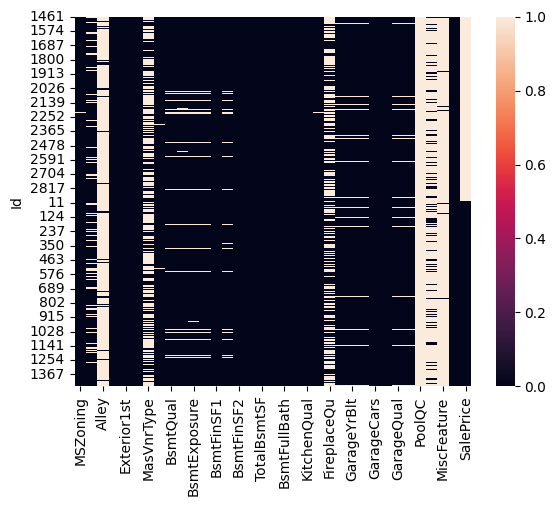

In [88]:
sns.heatmap(df_null.isnull())

In [89]:
df_objects = df[df.select_dtypes(include=['object']).columns]
df = df.drop(df[df_objects.isna().sum()[df_objects.isna().sum()> 1100].index], axis =1)

In [90]:
df_objects = df_objects.drop(df_objects[df_objects.isna().sum()[df_objects.isna().sum()> 1100].index], axis =1)
df_objects = df_objects.fillna('null')
df_objects_encoded = pd.get_dummies(df_objects)

In [91]:
df_objects['MSZoning'].value_counts()

,count
MSZoning,
RL,2265
RM,460
FV,139
RH,26
C (all),25
null,4


In [92]:
df_objects_encoded.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_null,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_null,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1461,False,False,True,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
1462,False,False,False,True,False,False,False,True,True,False,...,False,False,True,False,False,False,False,False,True,False
1463,False,False,False,True,False,False,False,True,True,False,...,False,False,True,False,False,False,False,False,True,False
1464,False,False,False,True,False,False,False,True,True,False,...,False,False,True,False,False,False,False,False,True,False
1465,False,False,False,True,False,False,False,True,True,False,...,False,False,True,False,False,False,False,False,True,False


In [93]:
for i in df_objects_encoded.columns:
    if 'null' in i:
        df_objects_encoded = df_objects_encoded.drop(i, axis=1)
        print(i)

MSZoning_null
Utilities_null
Exterior1st_null
Exterior2nd_null
BsmtQual_null
BsmtCond_null
BsmtExposure_null
BsmtFinType1_null
BsmtFinType2_null
Electrical_null
KitchenQual_null
Functional_null
GarageType_null
GarageFinish_null
GarageQual_null
GarageCond_null
SaleType_null


In [94]:
new_df = pd.concat([df, df_objects_encoded], axis=1)

In [95]:
len(new_df.columns)

304

In [96]:
len(df.columns), len(df_objects_encoded.columns)

(74, 230)

In [97]:
new_df = new_df.drop(df.select_dtypes(include=['object']).columns, axis=1)

In [98]:
new_df.isna().sum()[new_df.isna().sum()>0]

,0
LotFrontage,486
MasVnrArea,23
BsmtFinSF1,1
BsmtFinSF2,1
BsmtUnfSF,1
TotalBsmtSF,1
BsmtFullBath,2
BsmtHalfBath,2
GarageYrBlt,159
GarageCars,1


In [99]:
Mode_columns = ['GarageCars', 'GarageYrBlt', 'BsmtFullBath', 'BsmtHalfBath']
Mean_columns = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
                'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea']

for i in Mode_columns:
    new_df[i] = new_df[i].fillna(new_df[i].mode()[0])

for i in Mean_columns:
    new_df[i] = new_df[i].fillna(np.round(new_df[i].mean()))

new_df.isna().sum()[new_df.isna().sum() > 0]

,0
SalePrice,1459


In [100]:
training_data = new_df.loc[df_2.index].copy()
testing_data = new_df.loc[df_1.index].copy()
testing_data = testing_data.drop(columns='SalePrice')

# Drop rows with NaN in 'SalePrice' from training_data
training_data = training_data.dropna(subset=['SalePrice'])

MODEL MACHINE LEARNING SESSION

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [102]:
X = training_data.drop(columns='SalePrice')
y = training_data['SalePrice']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)
Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))
X_train.shape, Y_train.shape

((1168, 266), (1168, 1))

In [103]:
model_1 = LinearRegression()
model_1.fit(X, y)
y_pred = model_1.predict(X_test)
mean_squared_error(Y_test, y_pred)

464541734.3285927

In [104]:
model_2 = XGBRegressor(n_estimators=1000, learning_rate=0.1)
model_2.fit(X, y)
y_pred = model_2.predict(X_test)
mean_squared_error(Y_test, y_pred)

3285.024012683189

In [105]:
model_3 = RandomForestRegressor(n_estimators=100)
model_3.fit(X, y)
y_pred = model_3.predict(X_test)
mean_squared_error(Y_test, y_pred)

127853261.21573699

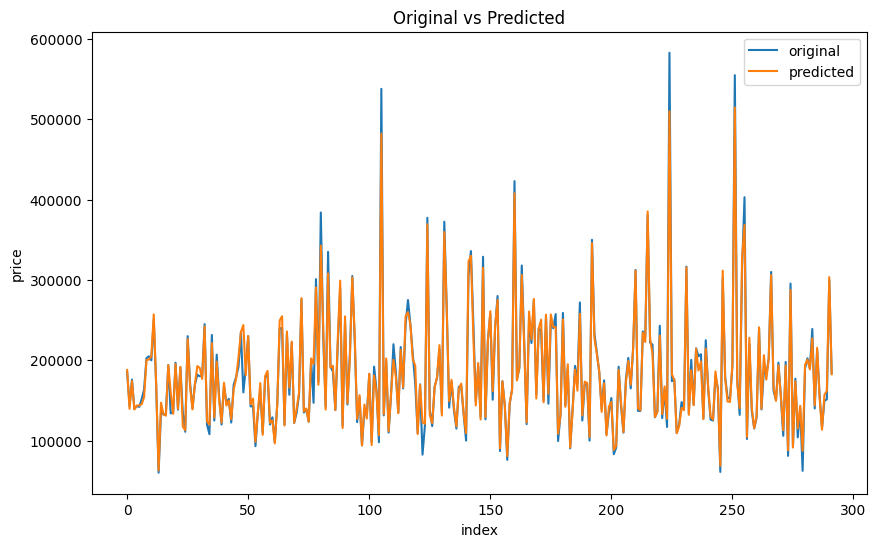

In [106]:
sort_indicades = np.argsort(Y_test)
#plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(Y_test)), Y_test, label = 'original')
plt.plot(np.arange(len(Y_test)), y_pred, label = 'predicted')
plt.xlabel('index')
plt.ylabel('price')
plt.title('Original vs Predicted')
plt.legend()
plt.show()

In [107]:
pred = model_2.predict(testing_data)

final = pd.DataFrame()
final['id'] = testing_data.index
final['SalePrice'] = pred
final.to_csv('submission.csv', index=False)